In [1]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import logging, warnings
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [2]:
# Import Plotly Packages
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot

In [3]:
## sklearn Packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud

In [5]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_path = "../../../yelp_dataset/"

## EDA on Business Dataset

In [7]:
# Reading Businesses CSV File
business_df = pd.read_csv(data_path + "business_dataset.csv")
business_df.drop(['Unnamed: 0'], axis=1, inplace = True)
business_df['categories'].fillna('', inplace=True)
print(business_df.shape)
business_df.head()


(10542, 12)


business_id                name             address  \
0  MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries         935 Race St   
1  MUTTqe8uqyMdBl186RmNeA            Tuna Bar         205 Race St   
2  ROeacJQwBeh05Rqg7F6TCg                 BAP       1224 South St   
3  aPNXGTDkf-4bjhyMBQxqpQ          Craft Hall  901 N Delaware Ave   
4  ppFCk9aQkM338Rgwpl2F5A                Wawa    3604 Chestnut St   

           city state  postal_code   latitude  longitude  stars  review_count  \
0  Philadelphia    PA      19107.0  39.955505 -75.155564    4.0            80   
1  Philadelphia    PA      19106.0  39.953949 -75.143226    4.0           245   
2  Philadelphia    PA      19147.0  39.943223 -75.162568    4.5           205   
3  Philadelphia    PA      19123.0  39.962582 -75.135657    3.5            65   
4  Philadelphia    PA      19104.0  39.954573 -75.194894    3.0            56   

   is_open                                         categories  
0        1  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1        1                  Sushi Bars, Restaurants, Japanese  
2        1                                Korean, Restaurants  
3        1  Eatertainment, Arts & Entertainment, Brewpubs,...  
4        1  Restaurants, Automotive, Delis, Gas Stations, ...

In [8]:
# Overview of Business Categories
business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')
print(str('The number of unique business categories is:'), len(business_categories))

# Most Common Business Categories
business_categories.categories.value_counts().head(25)

The number of unique business categories is: 46794


categories
Restaurants                  3525
Food                         2032
Shopping                     1537
Beauty & Spas                1083
Home Services                1029
Health & Medical              899
Nightlife                     896
Local Services                891
Bars                          793
Event Planning & Services     637
Automotive                    592
Coffee & Tea                  580
Sandwiches                    578
Pizza                         529
Active Life                   496
Arts & Entertainment          438
American (Traditional)        432
Hair Salons                   426
Breakfast & Brunch            415
American (New)                372
Fashion                       343
Real Estate                   338
Professional Services         333
Hotels & Travel               331
Nail Salons                   327
Name: count, dtype: int64

In [9]:
# Geographical Overview of Businesses in Philadelphia City
px.set_mapbox_access_token('pk.eyJ1IjoiZGhlZXJhanJrIiwiYSI6ImNsbXpmdm50aDFpNzMya3QzeHA3aDM0bGgifQ.PF4WltCX22acurDgpUCb2A')
fig = px.scatter_mapbox(business_df, lat="latitude", lon="longitude", color="stars", size="review_count", 
                        size_max=15, zoom=10, width=1000, height=800, color_continuous_scale="Inferno")
fig.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Restaurants'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Shopping'),
  Text(3, 0, 'Beauty & Spas'),
  Text(4, 0, 'Home Services'),
  Text(5, 0, 'Health & Medical'),
  Text(6, 0, 'Nightlife'),
  Text(7, 0, 'Local Services'),
  Text(8, 0, 'Bars'),
  Text(9, 0, 'Event Planning & Services')])

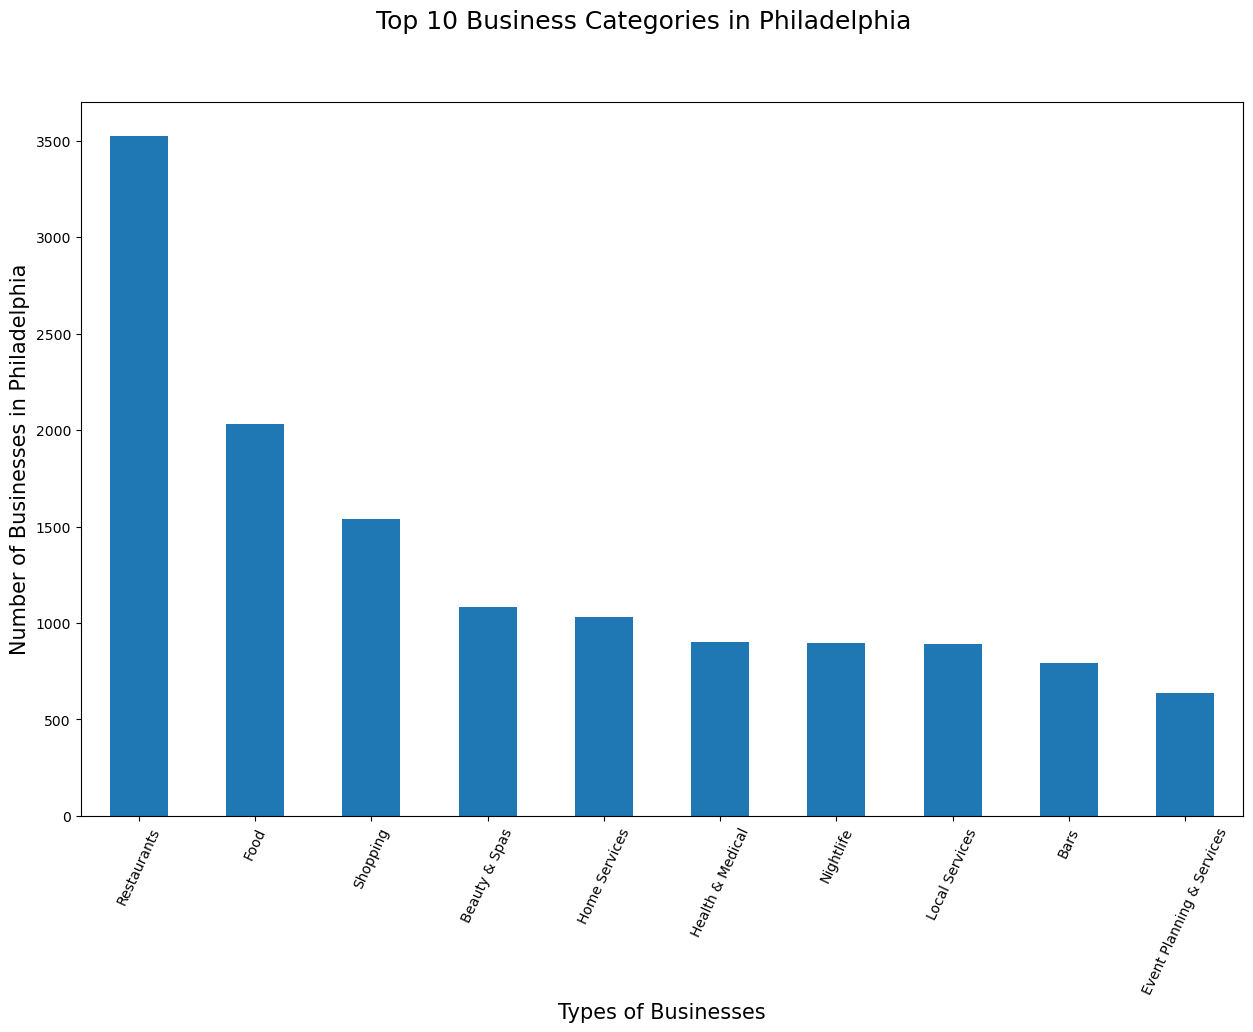

In [10]:
# Distribution of Types of Business Categories 

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')
top10_categories = business_categories.categories.value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 15/1.6180))
fig.suptitle('Top 10 Business Categories in Philadelphia', fontsize=18)
top10_categories.plot(kind = 'bar')
plt.ylabel('Number of Businesses in Philadelphia', fontsize=15)
plt.xlabel('Types of Businesses', fontsize=15)
plt.xticks(rotation=65)

In [11]:
# Overview of 'Shopping' type of Businesses in Philadelphia
shopping = business_df[business_df['categories'].str.contains("Shopping")]
print(shopping.shape)
shopping.head()

(1537, 12)


business_id                         name  \
6   xfmkEGiIERBaBMLhw-dTCg     Walmart Vision & Glasses   
11  h-y5azB-VlQAT3m7Ff2g2Q  P's & Q's - Premium Quality   
16  ONUZertKOOImiyQG66Z7Tg          Zakian Rug Cleaning   
18  D9Xez9uOSM4DgSjSTywq7w             King of Jewelers   
20  jL_NufxqXi-BpW5uXKsPwQ                 CVS Pharmacy   

                             address          city state  postal_code  \
6   1675 S Christopher Columbus Blvd  Philadelphia    PA      19148.0   
11                          820 S St  Philadelphia    PA      19147.0   
16                 4930 Parkside Ave  Philadelphia    PA      19131.0   
18                     737 Samson St  Philadelphia    PA      19106.0   
20                518 Port Royal Ave  Philadelphia    PA      19128.0   

     latitude  longitude  stars  review_count  is_open  \
6   39.919809 -75.157803    4.5             6        1   
11  39.942515 -75.156468    5.0            16        1   
16  39.979107 -75.217755    3.5            26        1   
18  39.948902 -75.153854    4.0             5        1   
20  40.061277 -75.237205    3.0            11        1   

                                           categories  
6                       Eyewear & Opticians, Shopping  
11                  Fashion, Shopping, Men's Clothing  
16  Carpet Cleaning, Rugs, Shopping, Flooring, Loc...  
18                                  Shopping, Jewelry  
20  Drugstores, Pharmacy, Health & Medical, Conven...

In [12]:
shopping.name.value_counts()

name
CVS Pharmacy                                      31
Rite Aid                                          26
ACME Markets                                      16
Target                                            11
AT&T Store                                         8
                                                  ..
Jack B Fabrics                                     1
RevZilla                                           1
Gary Mann Jewelers                                 1
University of Pennsylvania Computer Connection     1
Shanti Yoga and Ayurveda                           1
Name: count, Length: 1325, dtype: int64

In [13]:
cvs = shopping[shopping['name'].str.contains("CVS Pharmacy")]
cvs.head()


business_id          name                  address  \
20    jL_NufxqXi-BpW5uXKsPwQ  CVS Pharmacy       518 Port Royal Ave   
251   eDMFTNR_o3Z2wK8WmAo77Q  CVS Pharmacy             3780 Main St   
1530  BJzC-TOSsYhlYo8l6Gy3yQ  CVS Pharmacy           3331 Grant Ave   
1660  hu5GnI4NNTszi2jzQy2Acg  CVS Pharmacy       7520 City Line Ave   
1745  GJ7rs9e7xvxLo5gNx73I2g  CVS Pharmacy  490 N Broad St, Ste 100   

              city state  postal_code   latitude  longitude  stars  \
20    Philadelphia    PA      19128.0  40.061277 -75.237205    3.0   
251   Philadelphia    PA      19127.0  40.018625 -75.214313    3.0   
1530  Philadelphia    PA      19114.0  40.069241 -75.006022    1.5   
1660  Philadelphia    PA      19151.0  39.978000 -75.271600    2.5   
1745  Philadelphia    PA      19130.0  39.962234 -75.161690    1.0   

      review_count  is_open                                         categories  
20              11        1  Drugstores, Pharmacy, Health & Medical, Conven...  
251             33        1  Shopping, Convenience Stores, Pharmacy, Health...  
1530             7        1  Shopping, Drugstores, Food, Health & Medical, ...  
1660             6        1  Drugstores, Shopping, Pharmacy, Convenience St...  
1745             6        1  Pharmacy, Convenience Stores, Drugstores, Shop...

In [14]:
# Geographical Overview of CVS Pharmacy Outlets in Philadelphia
fig = px.scatter_mapbox(cvs, lat="latitude", lon="longitude", color="stars", size="review_count", 
                        size_max=15, zoom=10, width=1000, height=800, color_continuous_scale="Inferno")
fig.show()

## EDA on Reviews Data

In [15]:
# Reading Reviews Final CSV File
reviews_df = pd.read_csv(data_path + "reviews_dataset.csv")
reviews_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(reviews_df.shape)
reviews_df.head()

(504702, 9)


review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
4  qr7acpL3ZzP7cAmXaax93w  cMvau1VAjuKo_ah0ZBck1g  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
4    4.0  This place was a great find. I'd say its a 4.5...   

                  date  year  month      time  
0  2015-01-04 00:01:03  2015      1  00:01:03  
1  2017-01-02 14:25:26  2017      1  14:25:26  
2  2015-07-28 17:15:20  2015      7  17:15:20  
3  2015-06-21 01:11:14  2015      6  01:11:14  
4  2015-12-06 01:36:28  2015     12  01:36:28

In [16]:
# Sorting Businesses based on the number of reviews per business
review_count = business_df.sort_values(by = 'review_count', ascending = False)

# Creating a histogram using plotly_express
fig = px.histogram(review_count, x="review_count", 
                   title="Histogram of Reviews per Business",
                   labels={'review_count': 'Number of Reviews Per Business',
                          'count': 'Number of Businesses'})

# Showing the plot
fig.show()

In [17]:
# Overall Distribution of Ratings from Yelp Users

data = reviews_df['stars'].value_counts().sort_index(ascending=False)

fig = px.bar(x=data.index, y=data.values, labels={'x': 'Rating', 'y': 'Count'}, 
             text=['{:.1f} %'.format(val) for val in (data.values / reviews_df.shape[0] * 100)])

fig.update_layout(title='Distribution Of {} Business Ratings from Yelp Users'.format(reviews_df.shape[0]), 
                  xaxis_title='Rating', yaxis_title='Count')

fig.show()


### Sentiment Analysis

In [18]:
reviews_df['text'].head()


0    Wow!  Yummy, different,  delicious.   Our favo...
1    We've eaten here 3 times and it seems that eac...
2    Came to Philly for a family event but stayed a...
3    A very neat little hole in the wall. Very clea...
4    This place was a great find. I'd say its a 4.5...
Name: text, dtype: object

In order to gain a deeper understanding of the information in our reviews dataset, we will analyze the sentiment of the text content in the reviews. This analysis will help us determine the emotional experience of users when dining at various restaurants.

Using the distribution plot of the overall reviews from the previous section, we will categorize negative reviews as those with a Star/Rating of 1 or 2. Positive reviews will be classified as those with a Star/Rating of 5. The remaining reviews, with a Star/Rating of 3 or 4, will be considered neutral.

#### Negative Reviews

In [19]:
# Filtering for negative reviews (one and two star)

negative_review_df = [reviews_df[reviews_df['stars'] == star_rating] for star_rating in [1.0, 2.0]]
negative_reviews = pd.concat(negative_review_df)
print(negative_reviews.shape)
negative_reviews.sample(5)


(105622, 9)


review_id                 user_id  \
35004   iJRHcbOSL-xWdFQHssItOg  iT7tg2MQiMtSJ5BbUSwfyQ   
488891  9qKy3kU1e1Wyx9RcAgM11w  fDibzbgVUEdsmicr14a6Ag   
485606  bJjfTSyt4kRs8KtfGLBQ5Q  Lt2T_-M8eYlrIBmSN8AUUQ   
164092  9Qb19ToFFkOS0fQC6VcP-Q  wNW3RqxQ8Bae39eThzbtew   
304847  d95oyzFawGxdh8Aqi4_dEQ  YBRpSp3KKkYtjIurY0cGQA   

                   business_id  stars  \
35004   _9x1oSQghxEPuUeb5NPShw    1.0   
488891  pmnaMretlgmAA96i8Z7NFw    2.0   
485606  cWu31txqrvLHMCUNdmnxfQ    2.0   
164092  IkY2ticzHEn4QFn8hQLSWg    2.0   
304847  G0MgcqZAUlV_kaCha054UQ    1.0   

                                                     text  \
35004   Such a bad place! Would never want to come bac...   
488891  We went over the weekend thinking that we woul...   
485606  Good drinks but the rudest servers. Drinks wer...   
164092  Bread good, whiz good, grease good, onions har...   
304847  Worst bartender I've ever encountered. I went ...   

                       date  year  month      time  
35004   2017-03-19 01:36:39  2017      3  01:36:39  
488891  2019-03-18 13:06:24  2019      3  13:06:24  
485606  2018-11-24 08:25:18  2018     11  08:25:18  
164092  2018-06-27 02:08:15  2018      6  02:08:15  
304847  2018-06-15 20:31:54  2018      6  20:31:54

We have `105,622` rows of reviews data classified as **Negative Reviews**.

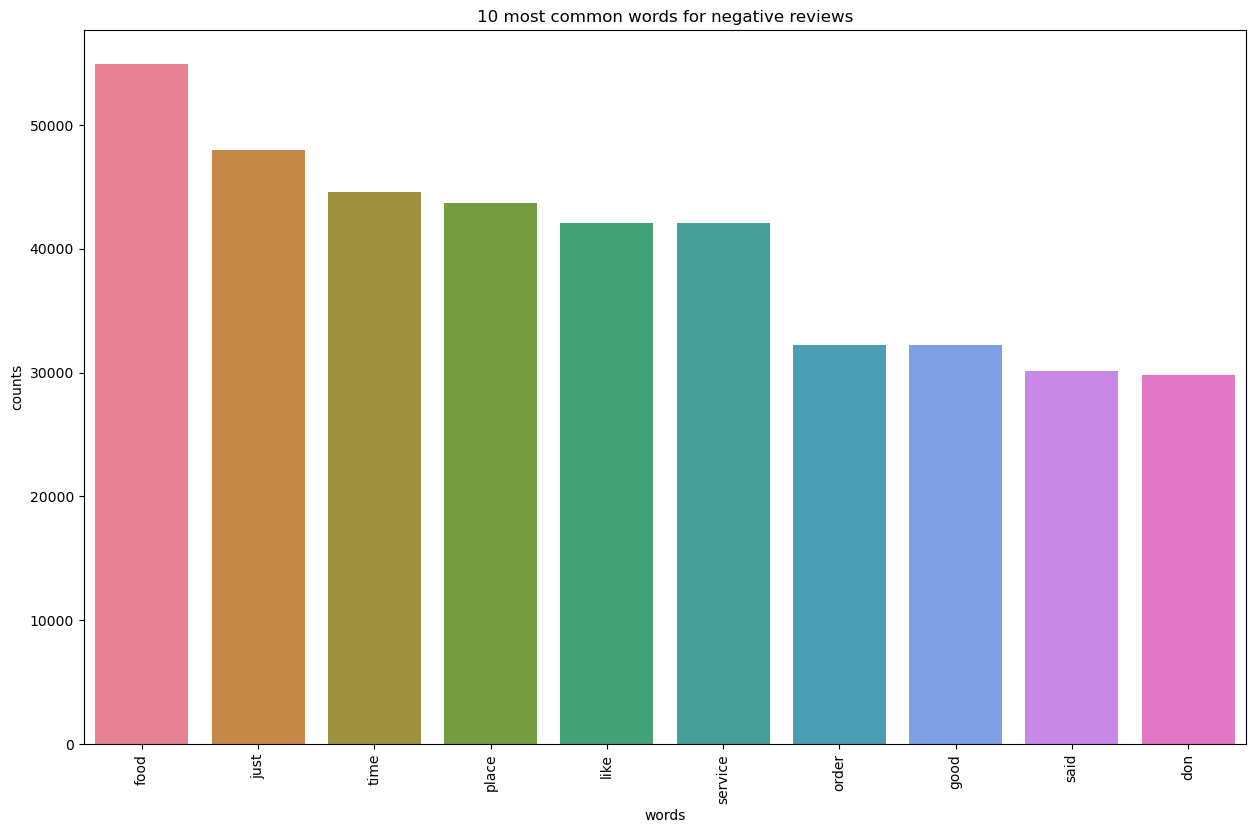

In [20]:
## Sentiment Analysis for Negative Reviews

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the review text
count_data = count_vectorizer.fit_transform(negative_reviews['text'])


feature_names = count_vectorizer.get_feature_names_out()

total_counts = np.zeros(len(feature_names))
for t in count_data:
    total_counts += t.toarray()[0]

count_dict = dict(zip(feature_names, total_counts))

count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]

# Create a bar chart of the 10 most common words
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words for negative reviews')
sns.barplot(x=x_pos, y=counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()


In negative reviews, words such as 'food', 'place', 'like' and "good" tend to appear frequently. However, these words alone do not provide much information about the sentiment of the negative reviews. Therefore, we need to eliminate these words before generating our word cloud visualization.

In [21]:
# Let's use the stop_words argument to remove words like "and, the, a"
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(negative_reviews['text'])

# Transforming using the fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(negative_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(200)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food', 'place', 'like', 'good'], inplace = True)
negative_top.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


would  time  get  one  service  back  never  order  even  us  go  said  \
0      0     0    0    0        0     1      0      0     1   0   1     0   
1      0     0    0    0        0     0      0      0     0   0   0     0   
2      0     0    0    0        1     0      0      0     0   0   0     0   
3      0     1    0    0        0     0      0      1     1   3   0     0   
4      0     1    0    0        0     0      0      0     0   0   0     0   

   told  got  ordered  could  asked  came  people  minutes  went  really  \
0     0    0        1      0      0     0       0        0     1       0   
1     0    0        0      0      0     1       0        0     0       0   
2     0    0        0      1      1     0       0        1     0       0   
3     0    0        0      0      0     1       0        0     0       0   
4     0    3        2      0      0     1       0        0     0       0   

   also  first  called  ...  instead  waitress  meal  walked  decided  \
0     0      0       0  ...        0         0     0       0        0   
1     0      0       0  ...        0         0     0       0        0   
2     0      0       0  ...        0         2     0       0        0   
3     0      0       0  ...        0         1     0       0        0   
4     0      0       0  ...        0         2     0       0        0   

   thought  different  owner  old  area  coming  fries  point  quality  least  \
0        0          0      0    0     0       0      0      0        0      0   
1        0          0      0    0     0       0      0      0        0      0   
2        0          0      0    0     1       0      0      0        0      0   
3        0          0      0    0     0       0      0      0        0      0   
4        0          0      0    0     0       0      0      0        0      0   

   meat  looking  arrived  worth  feel  guy  trying  enough  extremely  door  
0     0        0        0      0     0    0       0       0          0     0  
1     0        0        0      0     0    0       0       0          0     0  
2     0        0        0      0     0    0       0       0          0     0  
3     0        0        0      0     0    0       0       0          0     1  
4     0        0        0      0     0    0       0       0          0     0  

[5 rows x 196 columns]

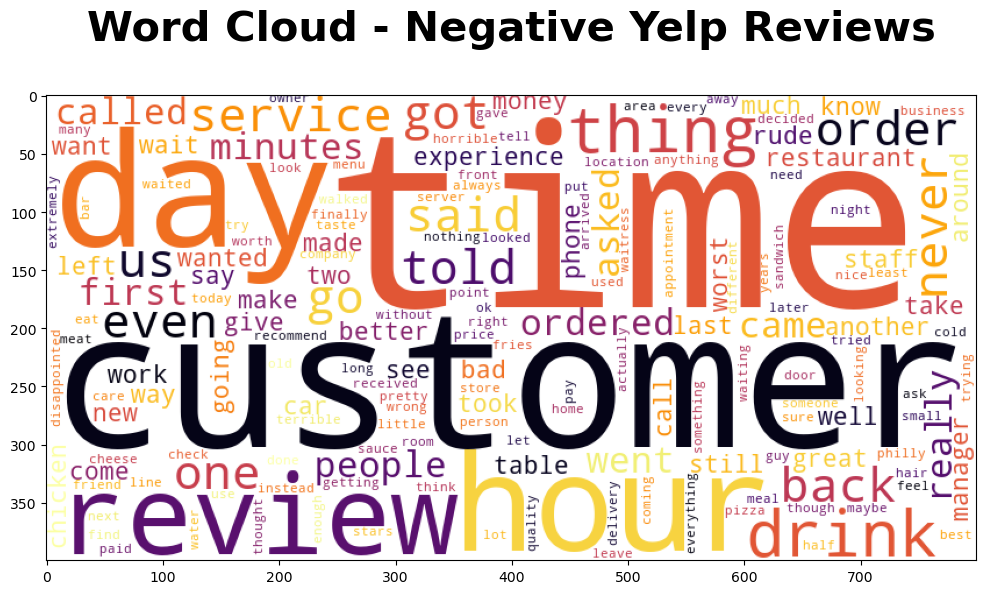

In [22]:
# Create a WordCloud object
wc = WordCloud(max_words=200, min_font_size=10, height=400, width=800, background_color="white", colormap="inferno", font_step=10)
wc.generate(' '.join(negative_top))
fig = plt.figure(figsize=(12, 12/1.6180))
plt.imshow(wc)
plt.title('Word Cloud - Negative Yelp Reviews\n', fontsize=30, weight=600)
plt.show()


In [23]:
# Sorting Businesses based on number of reviews

negative_reviews['business_id'].value_counts()

business_id
IkY2ticzHEn4QFn8hQLSWg    739
-QI8Qi8XWH3D8y8ethnajA    617
PP3BBaVxZLcJU54uP_wL6Q    610
AGlh4ZDv6jnoiYfz7At9mw    348
6zEWIsb6Lhr3BeoC3gm1lw    327
                         ... 
nt-XKjNGHE4d1lQTfud90Q      1
B71qd7T1voSiewKHUWD1cg      1
mLJJa9r2h1yoh1dWUqekKQ      1
_AGmdAQxIjHiqMFCZC-Uaw      1
4NYZ-PHH7GDgjfIO7_Vfgg      1
Name: count, Length: 8729, dtype: int64

In [24]:
# Business with most negative reviews

worst_business = business_df[business_df['business_id'] == 'IkY2ticzHEn4QFn8hQLSWg']
worst_business

business_id           name        address          city  \
4051  IkY2ticzHEn4QFn8hQLSWg  Geno's Steaks  1219 S 9th St  Philadelphia   

     state  postal_code   latitude  longitude  stars  review_count  is_open  \
4051    PA      19147.0  39.933837 -75.158814    2.5          3401        1   

                                             categories  
4051  Sandwiches, Cheesesteaks, Steakhouses, Restaur...

In [25]:
# Filtering Reviews from the Worst Business

worst_business_reviews = negative_reviews[negative_reviews['business_id'] == 'IkY2ticzHEn4QFn8hQLSWg']
worst_business_reviews.head()

review_id                 user_id  \
164023  dr9CP173QjAZNlb08Qi-Cg  cCYArHl94nio8-9032ut9A   
164024  cuj8HdMwK42fbGTozDM7Jg  RpxQ6TjGrYmJziVhb-Se3Q   
164029  djVhTlKZw5CrrtjuIpIREQ  I5_vbNbbAyWyzLGV_Ees7Q   
164034  kbfWSLpyIC6XUObA3qRefQ  ALLVYYQ54TADycK1UxadkA   
164040  P8tWu82F5UGUX-8hqUDdVg  T6jCRh9Qi6bzAp-TG2Duvw   

                   business_id  stars  \
164023  IkY2ticzHEn4QFn8hQLSWg    1.0   
164024  IkY2ticzHEn4QFn8hQLSWg    1.0   
164029  IkY2ticzHEn4QFn8hQLSWg    1.0   
164034  IkY2ticzHEn4QFn8hQLSWg    1.0   
164040  IkY2ticzHEn4QFn8hQLSWg    1.0   

                                                     text  \
164023  Total tourist trap.  Super expensive steak umm...   
164024  I cringed just giving this place one star! It ...   
164029  Really??? So disappointed. I have scene this p...   
164034  Was dragged here while the group I visited Phi...   
164040  I don't know what I expected when all my Lyft ...   

                       date  year  month      time  
164023  2015-01-18 22:34:44  2015      1  22:34:44  
164024  2015-10-23 17:20:27  2015     10  17:20:27  
164029  2015-03-19 17:57:52  2015      3  17:57:52  
164034  2015-10-27 17:44:49  2015     10  17:44:49  
164040  2016-03-08 18:49:40  2016      3  18:49:40

In [26]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(worst_business_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(worst_business_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(300)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food', 'like', 'restaurant', 'place', 'good', 'better', 'great','nice', 'really', 'much', 'one', 'even', 'us', 'got', 'go', 'came'], inplace = True)
negative_top.head()

cheesesteak  cheese  philly  geno  steak  meat  sandwich  pat  bread  get  \
0            0       0       1     0      2     0         0    0      1    0   
1            1       0       0     0      2     0         3    0      0    0   
2            0       1       2     0      0     1         0    0      0    0   
3            1       2       1     0      0     0         0    1      0    1   
4            1       2       1     0      1     1         0    0      1    0   

   would  onions  cheesesteaks  time  try  fries  flavor  first  dry  street  \
0      0       0             0     0    0      0       0      0    0       0   
1      0       0             0     0    1      0       0      0    1       0   
2      0       0             0     0    0      0       1      0    0       0   
3      0       0             0     0    0      2       0      0    0       0   
4      1       1             0     1    0      0       0      0    0       0   

   steaks  pats  line  order  went  ...  husband  overpriced  customers  \
0       0     0     0      0     0  ...        0           0          0   
1       0     0     0      0     0  ...        0           0          0   
2       1     0     0      0     0  ...        0           0          0   
3       0     0     0      0     0  ...        0           0          0   
4       0     0     1      0     0  ...        0           0          0   

   stale  pay  seriously  tastes  special  grease  bun  high  meh  known  \
0      0    0          0       0        0       0    0     0    0      0   
1      0    0          0       0        0       0    0     0    0      0   
2      0    0          0       0        0       0    0     0    0      0   
3      0    0          0       0        0       0    0     0    0      0   
4      0    0          0       1        0       0    0     0    0      0   

   airport  live  small  onion  care  slices  nasty  avoid  makes  warm  \
0        0     0      0      0     0       0      0      0      0     0   
1        0     0      0      0     0       0      0      0      0     0   
2        0     0      0      0     0       0      0      0      0     0   
3        0     0      0      0     0       0      0      0      0     0   
4        0     0      0      0     0       0      0      0      0     0   

   found  end  
0      0    0  
1      0    0  
2      0    0  
3      0    0  
4      0    0  

[5 rows x 284 columns]

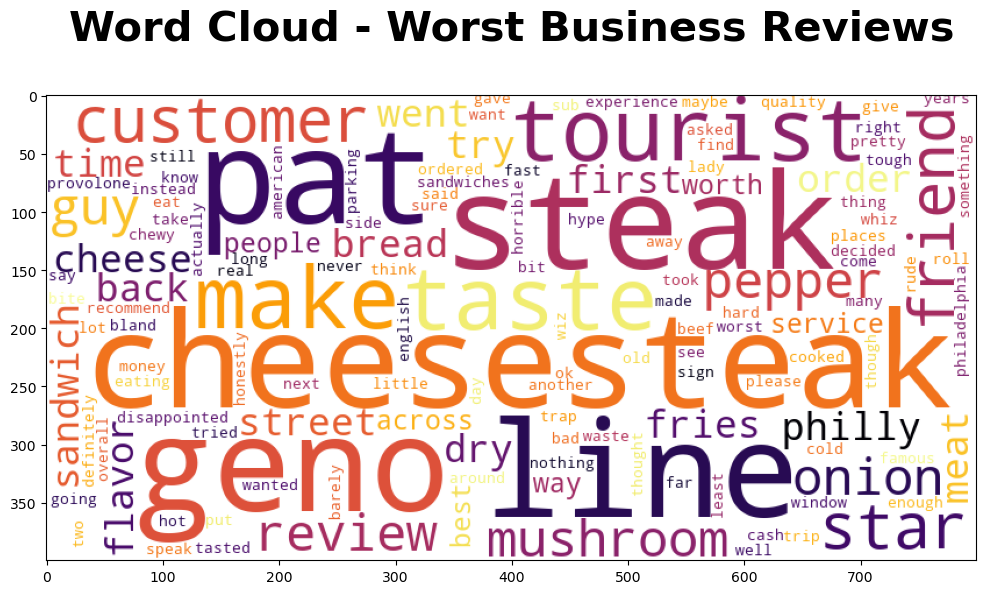

In [27]:
# Create a WordCloud object
wc = WordCloud(max_words=300, min_font_size=10, height=400, width=800, background_color="white", colormap="inferno", font_step=10)
wc.generate(' '.join(negative_top))
fig = plt.figure(figsize=(12, 12/1.6180))
plt.imshow(wc)
plt.title('Word Cloud - Worst Business Reviews\n', fontsize=30, weight=600)
plt.show()

#### Positive Reviews

In [28]:
# Filtering for positive reviews (five star)

positive_reviews = reviews_df[reviews_df['stars'] == 5.0]
print(positive_reviews.shape)
positive_reviews.head()

(249349, 9)


review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
5  T4eUUk_WL-m_wbfjczt8WQ  MpIZMLdDjZRu5BzGyEjEOw  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
5    5.0  I love the food, love the owner the lady who w...   

                  date  year  month      time  
0  2015-01-04 00:01:03  2015      1  00:01:03  
1  2017-01-02 14:25:26  2017      1  14:25:26  
2  2015-07-28 17:15:20  2015      7  17:15:20  
3  2015-06-21 01:11:14  2015      6  01:11:14  
5  2016-07-15 01:02:25  2016      7  01:02:25

We have `249,349` rows of reviews data classified as **Positive Reviews**.

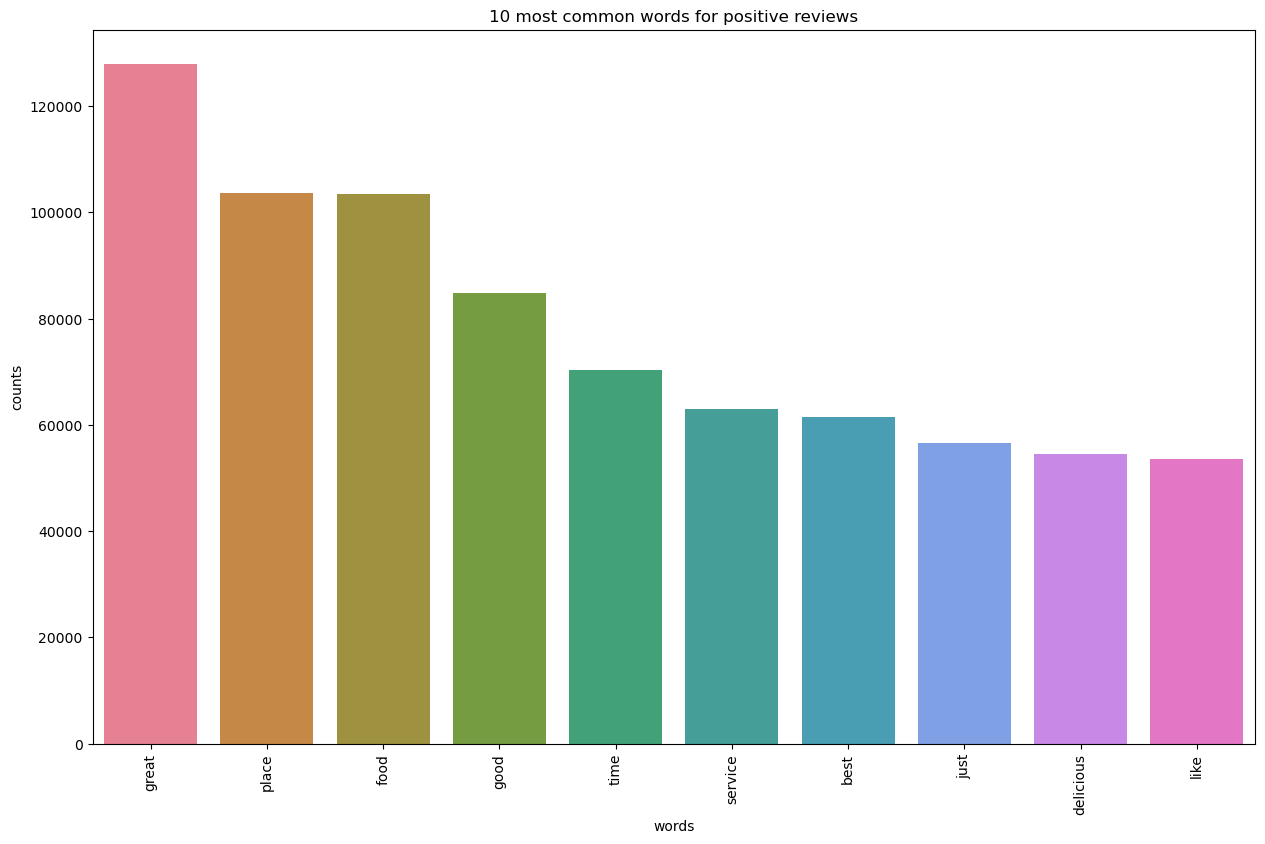

In [29]:
## Sentiment Analysis for Positive Reviews

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the review text
count_data = count_vectorizer.fit_transform(positive_reviews['text'])


feature_names = count_vectorizer.get_feature_names_out()

total_counts = np.zeros(len(feature_names))
for t in count_data:
    total_counts += t.toarray()[0]

count_dict = dict(zip(feature_names, total_counts))

count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]

# Create a bar chart of the 10 most common words
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words for positive reviews')
sns.barplot(x=x_pos, y=counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()


In [30]:
# Let's use the stop_words argument to remove words like "and, the, a"
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(positive_reviews['text'])

# Transforming using the fitted cvec and converting the result to a DataFrame

positive_words = pd.DataFrame(cvec.transform(positive_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(200)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food', 'place', 'like', 'good','great'], inplace = True)
positive_top.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


time  service  best  also  back  one  get  go  delicious  amazing  really  \
0     0        0     0     0     0    0    0   1          1        0       0   
1     3        1     0     0     0    0    0   1          0        0       0   
2     0        0     0     0     0    0    0   0          1        0       0   
3     0        0     0     0     1    0    0   0          0        0       0   
4     0        0     1     0     0    0    1   0          0        1       0   

   definitely  would  love  always  recommend  well  philly  friendly  got  \
0           0      0     0       0          0     0       0         0    0   
1           0      0     0       1          0     0       0         0    0   
2           0      0     0       0          0     0       1         0    0   
3           1      0     0       0          0     0       0         0    0   
4           0      0     2       0          0     0       0         0    0   

   staff  nice  us  even  everything  ...  taste  customer  getting  \
0      0     0   0     0           0  ...      0         0        0   
1      0     0   0     1           0  ...      0         0        0   
2      0     0   0     0           0  ...      0         0        0   
3      0     0   0     0           0  ...      0         0        0   
4      0     0   0     0           0  ...      0         0        0   

   breakfast  perfectly  though  fast  away  big  enjoyed  house  thing  \
0          0          0       0     0     0    0        0      0      0   
1          0          0       0     0     0    0        0      0      0   
2          0          0       0     0     0    0        0      0      0   
3          0          0       0     0     0    0        0      0      0   
4          0          0       0     0     0    0        0      0      0   

   extremely  thank  care  free  old  drink  cheesesteak  gave  minutes  \
0          0      0     0     0    0      0            0     0        0   
1          0      0     0     0    0      0            0     0        0   
2          0      0     0     0    0      0            0     0        0   
3          1      0     0     0    0      0            0     0        0   
4          0      0     0     0    1      0            0     0        0   

   check  room  without  dessert  
0      0     0        0        0  
1      0     0        0        0  
2      0     0        0        0  
3      0     0        0        0  
4      0     0        0        0  

[5 rows x 195 columns]

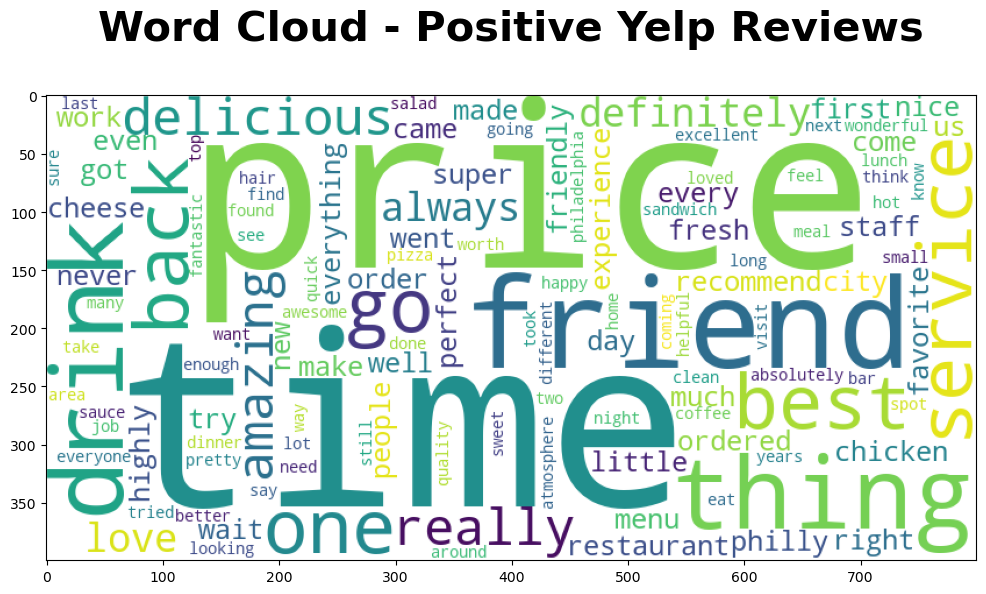

In [31]:
# Create a WordCloud object
wc = WordCloud(min_font_size=10, height=400, width=800, background_color="white", font_step=10)
wc.generate(' '.join(positive_top))
fig = plt.figure(figsize=(12, 12/1.6180))
plt.imshow(wc)
plt.title('Word Cloud - Positive Yelp Reviews\n', fontsize=30, weight=600)
plt.show()


In [32]:
# Sorting Businesses based on number of reviews

positive_reviews['business_id'].value_counts()

business_id
ytynqOUb3hjKeJfRj5Tshw    2728
ctHjyadbDQAtUFfkcAFEHw    1606
RQAF6a0akMiot5lZZnMNNw    1296
0RuvlgTnKFbX3IK0ZOOocA    1116
6ajnOk0GcY9xbb5Ocaw8Gw    1059
                          ... 
30SveE-LXZ6a77oqBBBFEw       1
ACcP-66gbXKf4mrbpqWllg       1
6JNQFy_qdIQ9Wd8rcnhcZA       1
n3AfTDppXYAd4lQtnEJtoQ       1
RROICJV1SdNKeua8QOSfhA       1
Name: count, Length: 9708, dtype: int64

In [33]:
# Business with most positive reviews

best_business = business_df[business_df['business_id'] == 'ytynqOUb3hjKeJfRj5Tshw']
best_business

business_id                     name       address  \
10010  ytynqOUb3hjKeJfRj5Tshw  Reading Terminal Market  51 N 12th St   

               city state  postal_code   latitude  longitude  stars  \
10010  Philadelphia    PA      19107.0  39.953341 -75.158855    4.5   

       review_count  is_open  \
10010          5721        1   

                                              categories  
10010  Candy Stores, Shopping, Department Stores, Fas...

In [34]:
# Filtering Reviews from the Worst Business

best_business_reviews = positive_reviews[positive_reviews['business_id'] == 'ytynqOUb3hjKeJfRj5Tshw']
best_business_reviews.head()

review_id                 user_id  \
456871  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
456872  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
456873  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
456876  dXVhYlcX9X9kqVI16AoBHg  lavyYLh68LxIBhJdIE5f_g   
456877  9CK6oJPgJEqa9pBCAhZxIg  5jMVOTXxWDoGx4iO9q2EPA   

                   business_id  stars  \
456871  ytynqOUb3hjKeJfRj5Tshw    5.0   
456872  ytynqOUb3hjKeJfRj5Tshw    5.0   
456873  ytynqOUb3hjKeJfRj5Tshw    5.0   
456876  ytynqOUb3hjKeJfRj5Tshw    5.0   
456877  ytynqOUb3hjKeJfRj5Tshw    5.0   

                                                     text  \
456871  I love this place! Doesn't take me long to get...   
456872  One of my favorite places to go to in Philly, ...   
456873  This might be a bit unfair to have a single re...   
456876  fresh seafood and produce. fresh breads, chees...   
456877  Reading terminal is always crowded. The food i...   

                       date  year  month      time  
456871  2016-08-25 16:30:53  2016      8  16:30:53  
456872  2016-07-14 20:24:15  2016      7  20:24:15  
456873  2017-04-07 22:27:22  2017      4  22:27:22  
456876  2015-08-19 10:21:14  2015      8  10:21:14  
456877  2017-01-27 22:53:28  2017      1  22:53:28

In [35]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(worst_business_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

positive_words = pd.DataFrame(cvec.transform(best_business_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(300)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food', 'like', 'restaurant', 'place', 'good', 'better', 'great','nice', 'really', 'much', 'one', 'even', 'us', 'got', 'go', 'came'], inplace = True)
positive_top.head()

philly  get  love  terminal  reading  many  fresh  best  eat  everything  \
0       0    1     1         0        0     0      0     0    0           0   
1       1    1     1         0        0     0      0     0    0           0   
2       0    0     0         0        0     0      1     1    1           0   
3       0    0     0         0        0     0      2     0    0           0   
4       0    0     0         1        1     0      1     0    0           0   

   time  must  places  visit  philadelphia  amazing  try  also  lunch  find  \
0     0     0       0      0             0        0    0     0      0     0   
1     0     0       1      0             0        0    0     0      1     0   
2     0     0       0      0             1        0    0     0      0     0   
3     0     0       0      0             0        0    0     0      1     0   
4     0     0       1      0             0        0    0     0      0     0   

   city  want  always  something  cheese  ...  less  entire  head  park  \
0     0     0       0          0       0  ...     0       0     0     0   
1     0     0       0          0       2  ...     0       0     0     0   
2     0     1       0          0       0  ...     0       0     0     0   
3     0     0       0          0       1  ...     0       0     0     0   
4     0     0       1          0       0  ...     0       0     0     0   

   outside  bought  anywhere  provolone  said  actually  stomach  steaks  \
0        0       0         0          0     0         0        0       0   
1        0       0         0          0     0         0        0       0   
2        0       0         0          0     0         0        0       0   
3        0       0         0          0     0         0        0       0   
4        0       0         0          0     0         0        0       0   

   everywhere  amount  overall  building  watching  maybe  walked  might  \
0           0       0        0         0         0      0       0      0   
1           0       0        0         0         0      0       0      0   
2           0       0        0         0         0      0       0      1   
3           0       0        0         0         0      0       0      0   
4           0       0        0         0         0      0       0      0   

   counter  avoid  decide  end  keep  
0        0      0       0    0     0  
1        0      0       0    0     0  
2        0      0       0    0     0  
3        0      0       0    0     0  
4        0      0       0    0     0  

[5 rows x 284 columns]

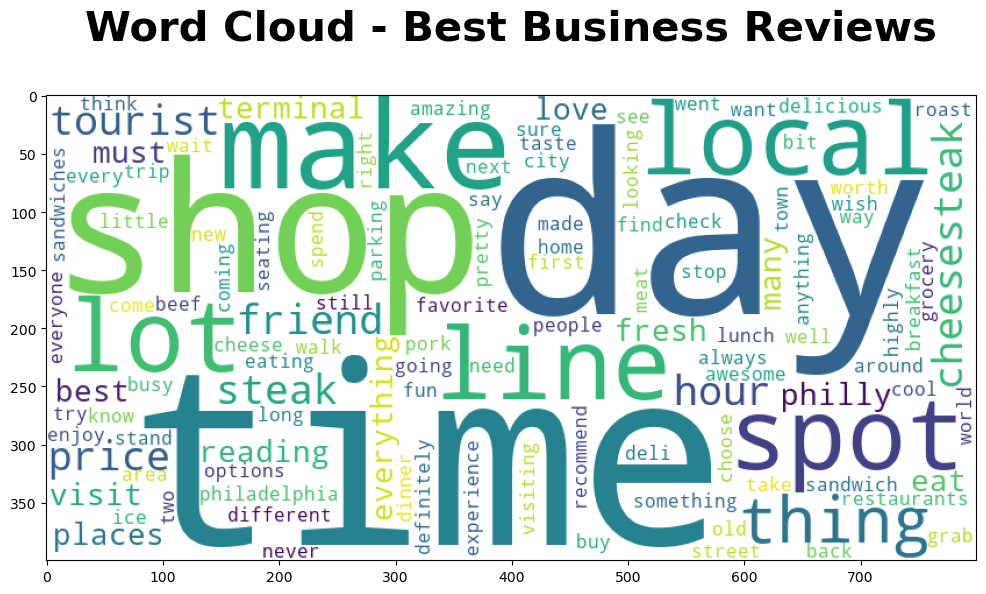

In [36]:
# Create a WordCloud object
wc = WordCloud(max_words=300, min_font_size=10, height=400, width=800, background_color="white", font_step=10)
wc.generate(' '.join(positive_top))
fig = plt.figure(figsize=(12, 12/1.6180))
plt.imshow(wc)
plt.title('Word Cloud - Best Business Reviews\n', fontsize=30, weight=600)
plt.show()

### Creating New Feature Columns

In [37]:
## Creating new feature columns
# Calculate reviews word count

reviews_df['word_count'] = reviews_df['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

reviews_df['char_count'] = reviews_df['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

reviews_df['avg_word_len'] = reviews_df['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_df['stopword_count'] = reviews_df['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

reviews_df.head()

review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
4  qr7acpL3ZzP7cAmXaax93w  cMvau1VAjuKo_ah0ZBck1g  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
4    4.0  This place was a great find. I'd say its a 4.5...   

                  date  year  month      time  word_count  char_count  \
0  2015-01-04 00:01:03  2015      1  00:01:03          48         243   
1  2017-01-02 14:25:26  2017      1  14:25:26          66         341   
2  2015-07-28 17:15:20  2015      7  17:15:20          28         149   
3  2015-06-21 01:11:14  2015      6  01:11:14          23         131   
4  2015-12-06 01:36:28  2015     12  01:36:28          91         465   

   avg_word_len  stopword_count  
0      4.900000              12  
1      4.246154              26  
2      4.357143              13  
3      4.739130               8  
4      4.120879              32